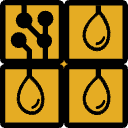

# This is the a breif description of the features in the Dataset

**About Dataset**
A powerplant engine( gas-turbine) is mainly used to generate electricity. Since the engine can different types of fuels, the engine can have different levels of CO2 and NO emission gases.
This dataset is generated from a gas turbine in Turkey. More info:
https://journals.tubitak.gov.tr/elektrik/issues/elk-19-27-6/elk-27-6-54-1807-87.pdf

Column name descriptions:

Variable (Abbr.) Unit Min Max Mean

**Ambient temperature (AT)** C â€“6.23 37.10 17.71

**Ambient pressure (AP)** mbar 985.85 1036.56 1013.07

**Ambient humidity (AH)** (%) 24.08 100.20 77.87

**Air filter difference pressure (AFDP)** mbar 2.09 7.61 3.93

**Gas turbine exhaust pressure (GTEP)** mbar 17.70 40.72 25.56

**Turbine inlet temperature (TIT)** C 1000.85 1100.89 1081.43

**Turbine after temperature (TAT)** C 511.04 550.61 546.16

**Compressor discharge pressure (CDP)** mbar 9.85 15.16 12.06

**Turbine energy yield (TEY)** MWH 100.02 179.50 133.51

**Carbon monoxide (CO)** mg/m3 0.00 44.10 2.37

**Nitrogen oxides (NOx)** mg/m3 25.90 119.91 65.29

## Important Libraries

Changing the directory and importing neccessary libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split , cross_val_score , KFold , GridSearchCV , learning_curve
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler,RobustScaler,FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
path = "C:/Users/Omid/Desktop/MDTE/Challenge 2/DT/DATASETS" # Directory on my file
os.chdir(path)

## Importing the Dataset

In [2]:
GT = pd.read_csv('gt_full.csv')
GT.head()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


## Spliting Train and test Data

In [3]:
from sklearn.model_selection import train_test_split

Target = GT[['CO','NOX']]

Feature = GT.drop(columns=['CO','NOX',],axis=1)

In [4]:
Feature.head()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910


In [5]:
Target.head()

,CO,NOX
0,0.32663,81.952
1,0.44784,82.377
2,0.45144,83.776
3,0.23107,82.505
4,0.26747,82.028


In [6]:
Feature.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

**Creating Train and Test sets for CO and NOX**

In [7]:
X , X_test , Y , Y_test = train_test_split(Feature,Target,train_size=0.85,random_state=42)

In [8]:
Y_CO = Y['CO']
Y_CO_Test = Y_test['CO']
Y_NOX = Y['NOX']
Y_NOX_Test = Y_test['NOX']

## Defining functions for Visualization

In [9]:
def box_hist_plot_complete(df):
    for column in df.columns:
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
        sns.boxplot(x = df[column], ax=ax_box)
        sns.histplot(x = df[column], ax=ax_hist,bins=100,kde=True, legend=True)
        ax_box.set(xlabel='')
        #ax_hist.axvline(avg_df[column], color="b",ls ="--" )               #These parts can also be implemented
        #ax_hist.axvline(med_df[column], color="r",ls ="--" )
        #ax_hist.axvline(mode_df[column], color="k",ls ="--" )
        ax_hist.axvline(np.quantile(df[column],0.25), color="m",ls ="--" )
        ax_hist.axvline(np.quantile(df[column],0.75), color="m",ls ="--" )
        #ax_hist.legend("quantile")
        ax_hist.set_title(f"Histogram {column}")
        #sns.move_legend(ax_hist, "upper left", bbox_to_anchor=(1, 1))            #move the legend because the image space is smaller now.

        plt.show()
def box_hist_plot(df,column):
 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
    sns.boxplot(x = df[column], ax=ax_box)
    sns.histplot(x = df[column], ax=ax_hist,bins=100,kde=True, legend=True)
    ax_box.set(xlabel='')
        #ax_hist.axvline(avg_df[column], color="b",ls ="--" )               #These parts can also be implemented
        #ax_hist.axvline(med_df[column], color="r",ls ="--" )
        #ax_hist.axvline(mode_df[column], color="k",ls ="--" )
    ax_hist.axvline(np.quantile(df[column],0.25), color="m",ls ="--" )
    ax_hist.axvline(np.quantile(df[column],0.75), color="m",ls ="--" )
    #ax_hist.legend("quantile")
    ax_hist.set_title(f"Histogram {column}")
        #sns.move_legend(ax_hist, "upper left", bbox_to_anchor=(1, 1))            #move the legend because the image space is smaller now.

    plt.show()

## Function for correlation matrix

In [10]:
# Compute the correlation matrix
def Cor_Matrix(df):
    correlation_matrix = df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

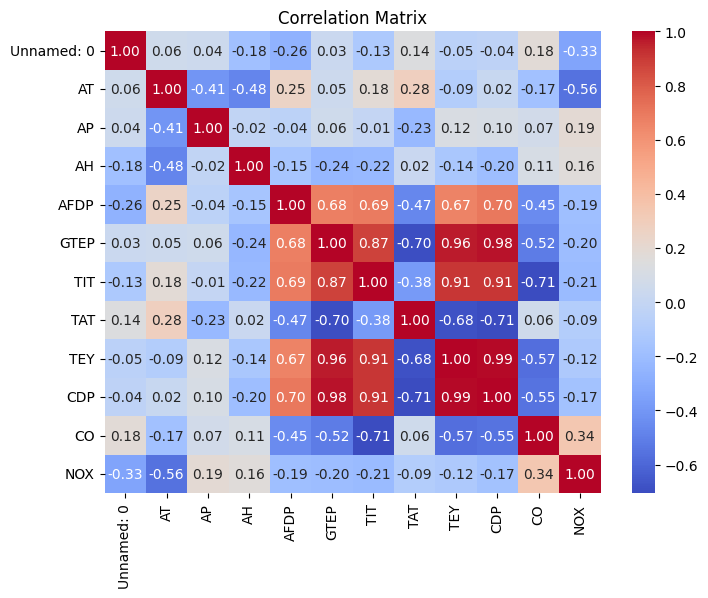

In [11]:
Cor_Matrix(GT)

# Data Preprocessing

In [12]:
X.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
count,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000
mean,17.719029,1013.041929,77.912898,3.924437,25.553307,1081.400698,546.163099,133.470366,12.058264
std,7.430450,6.444635,14.452980,0.774725,4.199038,17.541481,6.833211,15.624498,1.089234
min,-6.234800,986.250000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800
25%,11.806500,1008.800000,68.276500,3.353950,23.091000,1071.600000,544.720000,124.295000,11.424000
50%,17.817000,1012.600000,80.543000,3.936800,25.098000,1085.900000,549.880000,133.730000,11.963000
75%,23.661000,1016.900000,89.372500,4.377250,29.069000,1097.000000,550.040000,144.080000,12.854500
max,37.103000,1036.600000,100.200000,7.554900,40.716000,1100.900000,550.610000,179.500000,15.159000


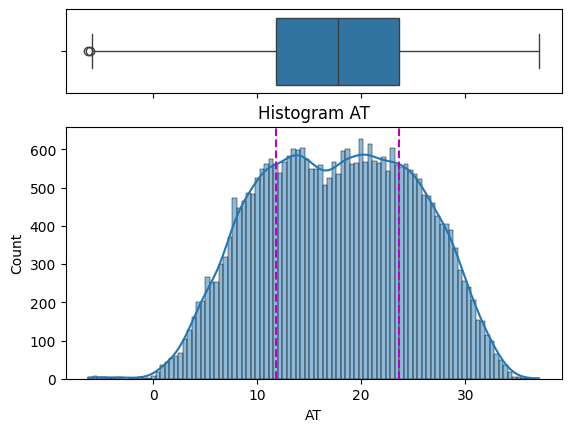

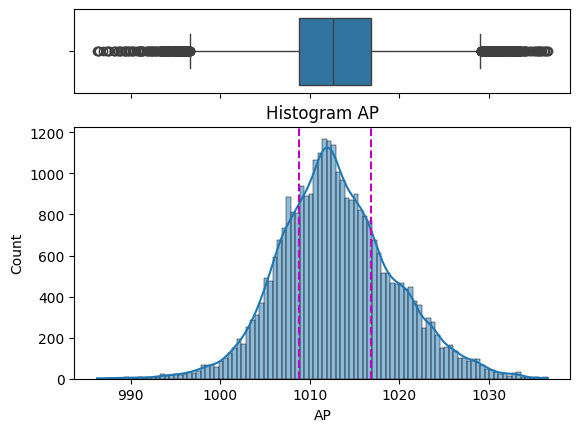

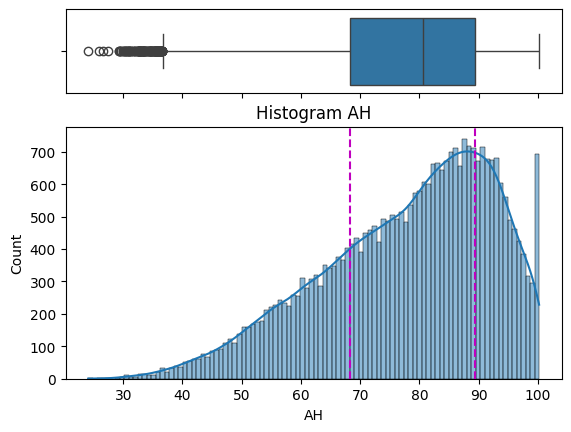

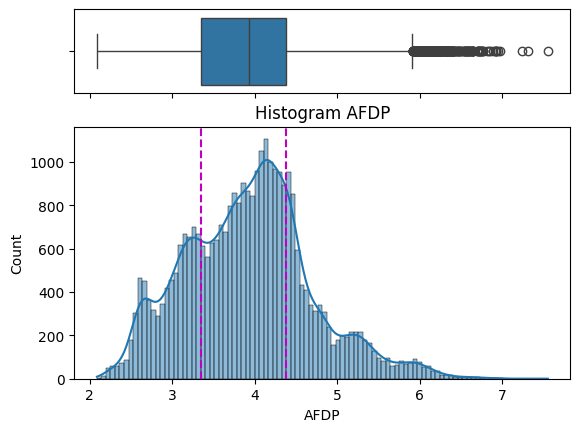

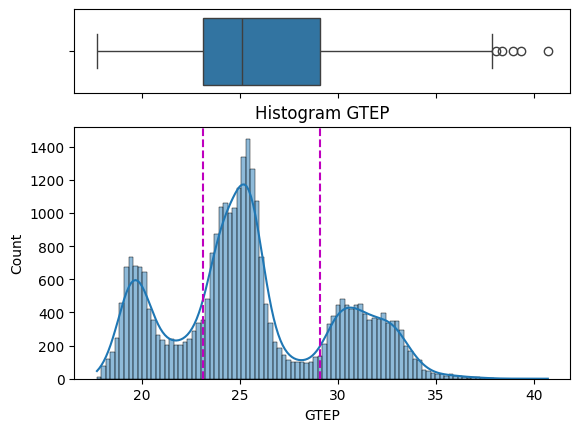

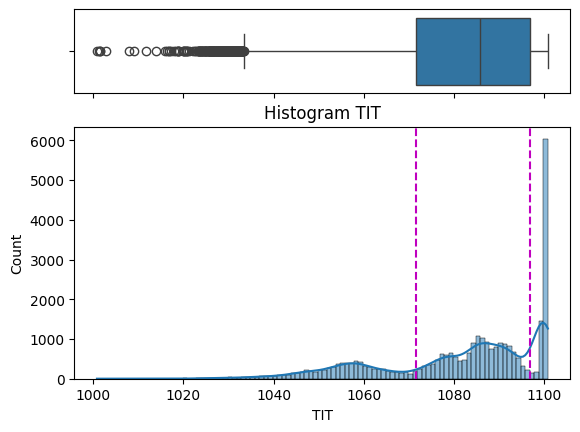

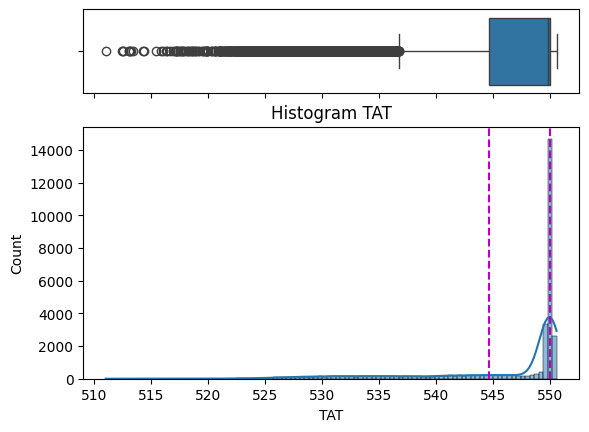

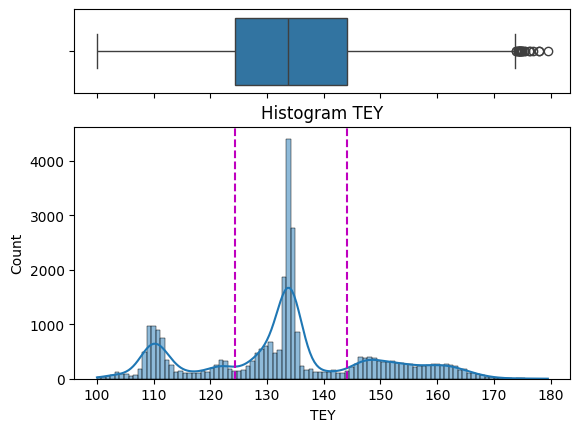

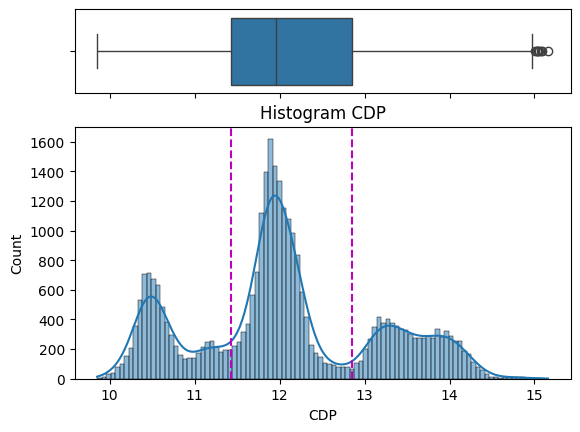

In [13]:
box_hist_plot_complete(X)

## Droping outliers in a Dataset

In [14]:
def outliers(data,target,cat):
    # Calculate Q1, Q3, and IQR
    Q1 = data[cat].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[cat].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_list = list(data[cat][(data[cat] < lower_bound) | (data[cat] > upper_bound)])

    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"outlier list is:",outliers_list)

    # Identify indices of rows to keep
    valid_indices = data[(data[cat] >= lower_bound) & (data[cat] <= upper_bound)].index

    # Filter both features and target using valid indices
    data = data.loc[valid_indices]
    target = target.loc[valid_indices]
    return data
    
            


    
    
    

    

In [15]:
outliers(X,Y_CO,'GTEP')
outliers(X,Y_NOX,'GTEP')

Lower bound: 14.124000000000004
Upper bound: 38.035999999999994
outlier list is: [38.051, 40.716, 39.37, 38.362, 38.922]
Lower bound: 14.124000000000004
Upper bound: 38.035999999999994
outlier list is: [38.051, 40.716, 39.37, 38.362, 38.922]


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
8537,5.8946,1027.80,74.088,4.4051,23.658,1083.5,550.02,133.78,11.830
29199,15.7260,1017.10,56.171,3.7053,32.945,1100.1,542.88,151.83,13.374
5707,24.6300,1011.90,68.847,4.0278,25.674,1092.3,550.05,134.22,12.209
19735,30.4850,1014.90,55.335,3.8906,20.640,1061.7,550.00,110.13,10.765
10299,29.0360,1013.40,46.049,4.1492,25.690,1090.8,549.92,132.84,12.126
...,...,...,...,...,...,...,...,...,...
16850,17.4020,995.03,62.418,2.7386,19.878,1056.4,550.08,110.65,10.523
6265,14.3410,1018.80,88.657,3.9225,24.138,1087.0,550.03,133.71,11.891
11284,24.5690,1011.80,70.774,4.1297,25.681,1092.3,549.59,134.76,12.253
860,6.8058,1016.20,86.976,3.9773,23.863,1084.6,550.26,134.37,11.916


In [16]:
outliers(X,Y_CO,'CDP')
outliers(X,Y_NOX,'CDP')

Lower bound: 9.27825
Upper bound: 15.000250000000001
outlier list is: [15.043, 15.029, 15.002, 15.031, 15.055, 15.081, 15.159, 15.083]
Lower bound: 9.27825
Upper bound: 15.000250000000001
outlier list is: [15.043, 15.029, 15.002, 15.031, 15.055, 15.081, 15.159, 15.083]


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
8537,5.8946,1027.80,74.088,4.4051,23.658,1083.5,550.02,133.78,11.830
29199,15.7260,1017.10,56.171,3.7053,32.945,1100.1,542.88,151.83,13.374
5707,24.6300,1011.90,68.847,4.0278,25.674,1092.3,550.05,134.22,12.209
19735,30.4850,1014.90,55.335,3.8906,20.640,1061.7,550.00,110.13,10.765
10299,29.0360,1013.40,46.049,4.1492,25.690,1090.8,549.92,132.84,12.126
...,...,...,...,...,...,...,...,...,...
16850,17.4020,995.03,62.418,2.7386,19.878,1056.4,550.08,110.65,10.523
6265,14.3410,1018.80,88.657,3.9225,24.138,1087.0,550.03,133.71,11.891
11284,24.5690,1011.80,70.774,4.1297,25.681,1092.3,549.59,134.76,12.253
860,6.8058,1016.20,86.976,3.9773,23.863,1084.6,550.26,134.37,11.916


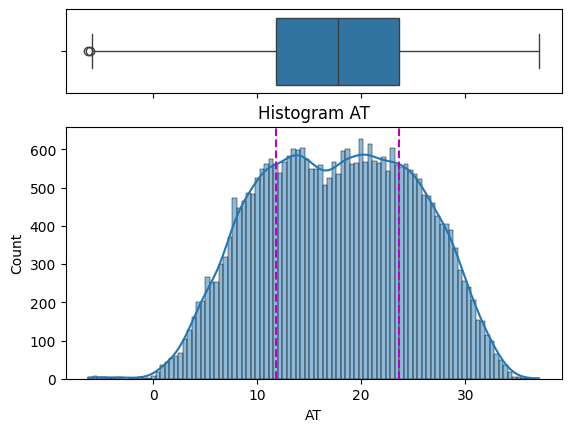

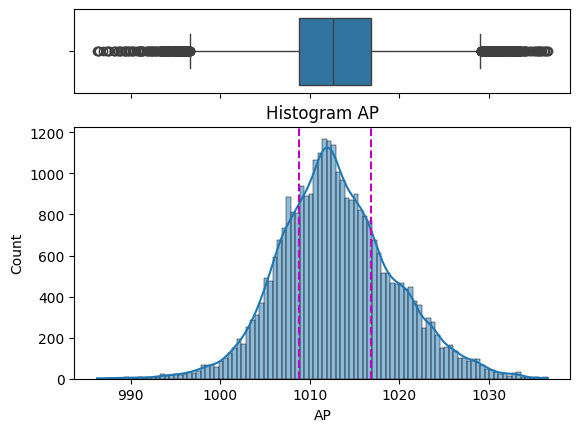

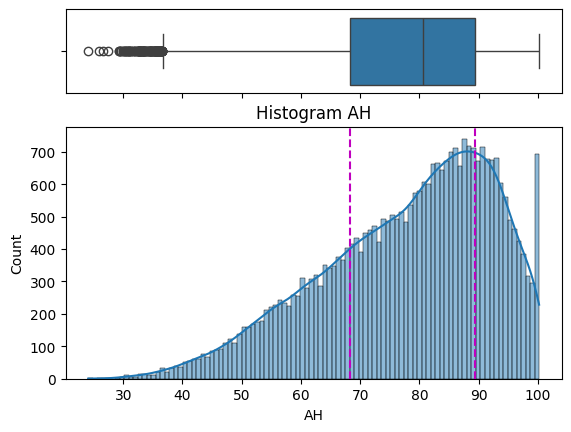

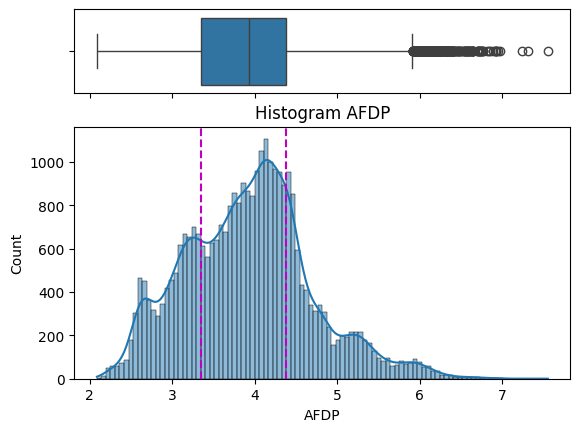

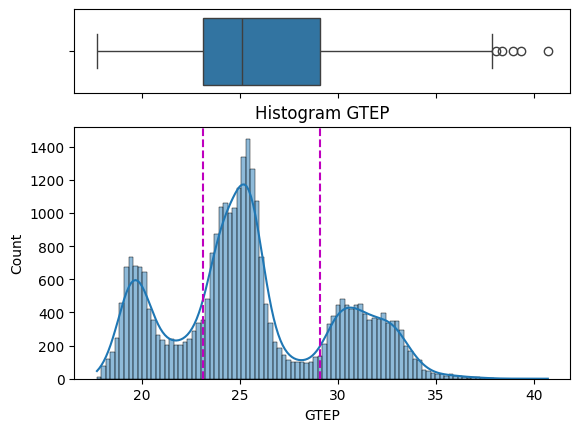

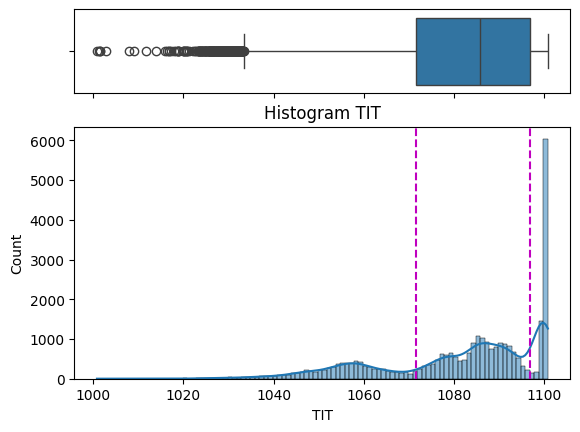

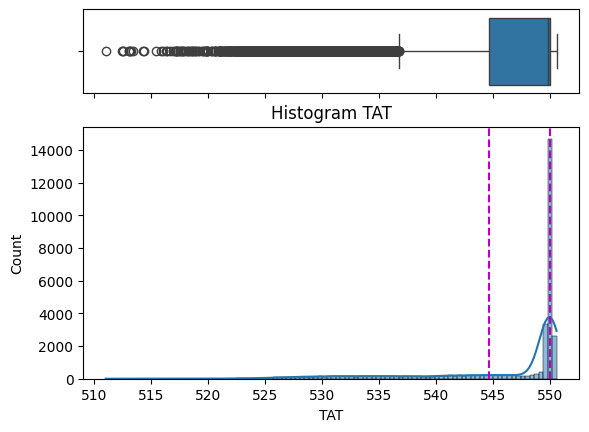

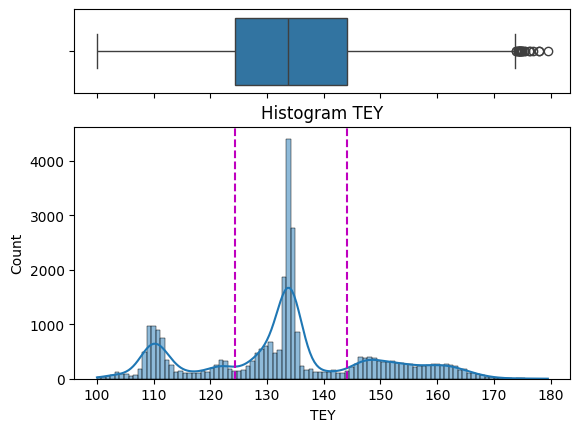

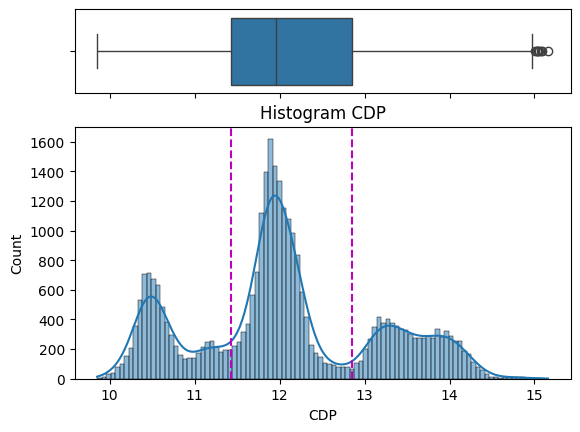

In [17]:
box_hist_plot_complete(X)

# Cross-Validation and Model Selection

For the purpose of having a better understanding of what make action makes my model more accurate, I first apply cross-validation of a Decision Tree Regressor on my data and then continued to make my model better

In [18]:

GB = GradientBoostingRegressor()

In [19]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)
def cross_val(X,Y):
    Scoring_GB = cross_val_score(GB,X,Y,scoring='neg_root_mean_squared_error',cv = cv)
    print(f"Cross-Validation average is {Scoring_GB.mean()}, with standard deviation of {Scoring_GB.std()}")
    


**First Cross-Validation without any preprocessing on CO and NOX**

In [20]:
cross_val(X,Y_CO)

Cross-Validation average is -1.2426520533597687, with standard deviation of 0.09027478853572138


In [21]:
cross_val(X,Y_NOX)

Cross-Validation average is -5.966875225440704, with standard deviation of 0.09285716727801442


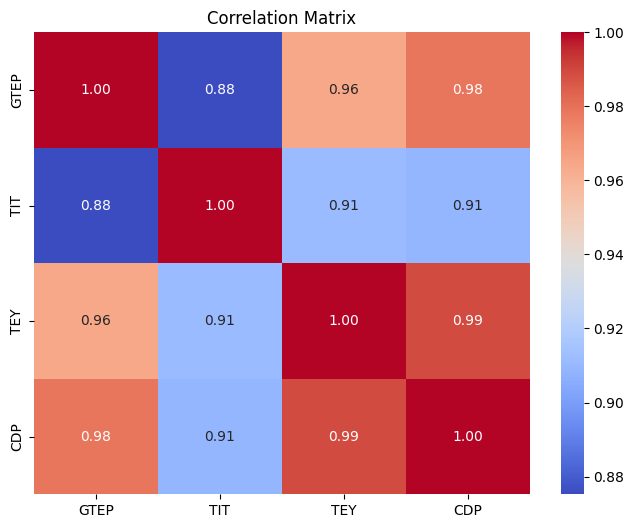

In [22]:
Cor_Matrix(X[['GTEP','TIT','TEY','CDP']])

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
Standard_scaler = StandardScaler()
X[['GTEP','TIT','TEY','CDP']] = Standard_scaler.fit_transform(X[['GTEP','TIT','TEY','CDP']])
pca = PCA(n_components=2)
Energy = pca.fit_transform(X[['GTEP','TIT','TEY','CDP']])

In [24]:
Energy

array([[-0.26461353,  0.34067266],
       [ 2.60674353, -0.31202427],
       [ 0.40968734,  0.4814084 ],
       ...,
       [ 0.44856936,  0.46575667],
       [-0.15055443,  0.34930768],
       [ 2.32019024, -0.07192089]])

In [25]:
X_PCA = X.drop(columns = ['GTEP','TIT','TEY','CDP'])
X_PCA[['PCA1','PCA2'] ]= Energy
X_PCA.head()

,AT,AP,AH,AFDP,TAT,PCA1,PCA2
8537,5.8946,1027.8,74.088,4.4051,550.02,-0.264614,0.340673
29199,15.7260,1017.1,56.171,3.7053,542.88,2.606744,-0.312024
5707,24.6300,1011.9,68.847,4.0278,550.05,0.409687,0.481408
19735,30.4850,1014.9,55.335,3.8906,550.00,-2.489839,0.058289
10299,29.0360,1013.4,46.049,4.1492,549.92,0.286731,0.438458


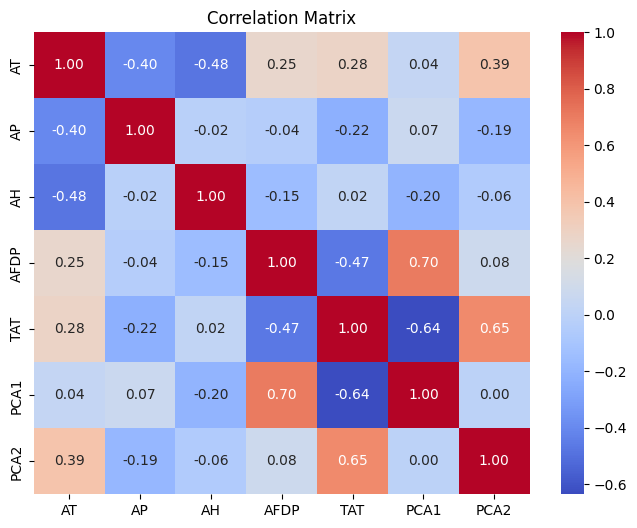

In [26]:
Cor_Matrix(X_PCA)

In order to know whether I have used the right number of components

In [27]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio by Component:", explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_variance_ratio)

Explained Variance Ratio by Component: [0.95372939 0.0359906 ]
Cumulative Explained Variance Ratio: [0.95372939 0.98971999]


In [28]:
X_PCA.describe()

,AT,AP,AH,AFDP,TAT,PCA1,PCA2
count,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,3.122300e+04,3.122300e+04
mean,17.719029,1013.041929,77.912898,3.924437,546.163099,-5.074818e-17,-9.102812e-19
std,7.430450,6.444635,14.452980,0.774725,6.833211,1.953213e+00,3.794298e-01
min,-6.234800,986.250000,24.085000,2.087400,511.040000,-4.878048e+00,-2.936594e+00
25%,11.806500,1008.800000,68.276500,3.353950,544.720000,-1.149417e+00,-2.079394e-01
50%,17.817000,1012.600000,80.543000,3.936800,549.880000,-1.603159e-02,1.785623e-02
75%,23.661000,1016.900000,89.372500,4.377250,550.040000,1.521598e+00,3.572790e-01
max,37.103000,1036.600000,100.200000,7.554900,550.610000,4.875437e+00,6.184181e-01


In [29]:
cross_val(X_PCA,Y_CO)

Cross-Validation average is -1.2347422982103915, with standard deviation of 0.06310633502534738


In [30]:
cross_val(X_PCA,Y_NOX)

Cross-Validation average is -5.867997305943736, with standard deviation of 0.10226507196056157


## Standardizing

For the features that are skewed Robust Scaler function is being used

In [31]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_PCA[['AH','TAT']] = rob_scaler.fit_transform(X[['AH','TAT']])



In [32]:
X_PCA.describe()

,AT,AP,AH,AFDP,TAT,PCA1,PCA2
count,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,3.122300e+04,3.122300e+04
mean,17.719029,1013.041929,-0.124673,3.924437,-0.698666,-5.074818e-17,-9.102812e-19
std,7.430450,6.444635,0.685105,0.774725,1.284438,1.953213e+00,3.794298e-01
min,-6.234800,986.250000,-2.676242,2.087400,-7.300752,-4.878048e+00,-2.936594e+00
25%,11.806500,1008.800000,-0.581461,3.353950,-0.969925,-1.149417e+00,-2.079394e-01
50%,17.817000,1012.600000,0.000000,3.936800,0.000000,-1.603159e-02,1.785623e-02
75%,23.661000,1016.900000,0.418539,4.377250,0.030075,1.521598e+00,3.572790e-01
max,37.103000,1036.600000,0.931788,7.554900,0.137218,4.875437e+00,6.184181e-01


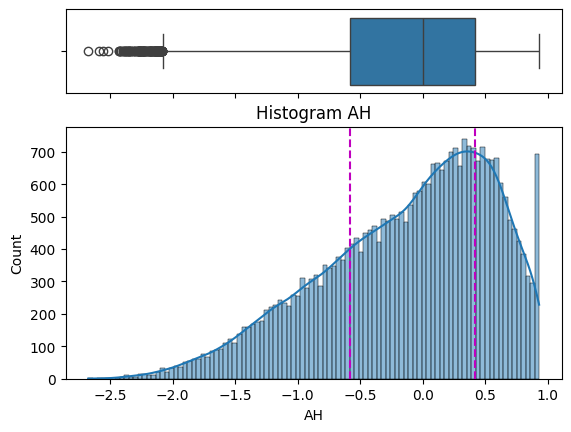

In [33]:
box_hist_plot(X_PCA,'AH')

In [34]:
Standard_scaler_For_The_Rest = StandardScaler()

In [35]:
X_PCA[['AP','AT','AFDP']] = Standard_scaler_For_The_Rest.fit_transform(X[['AP','AT','AFDP']])

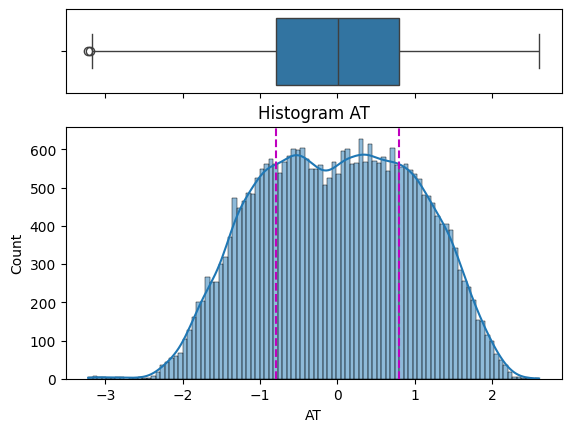

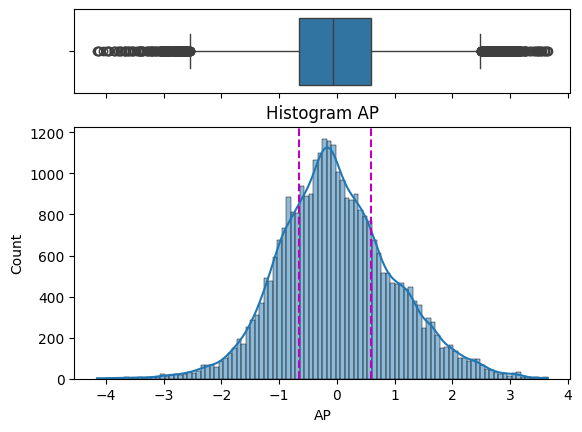

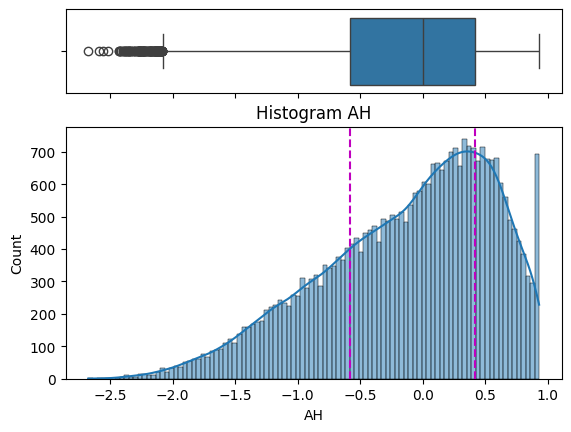

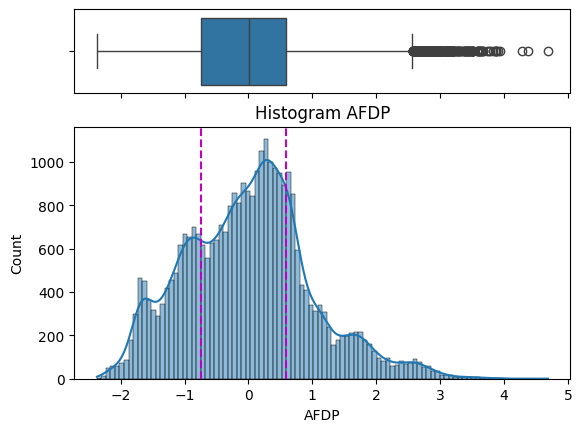

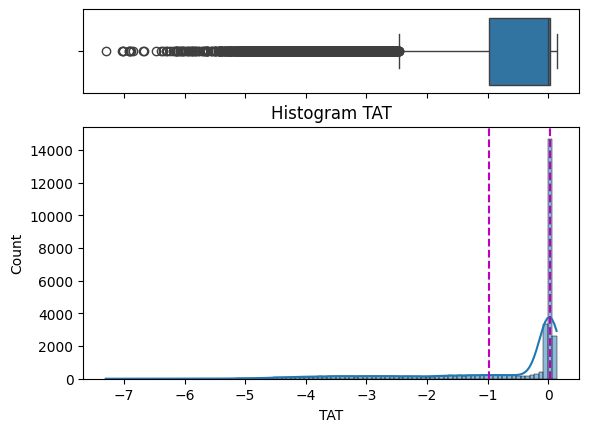

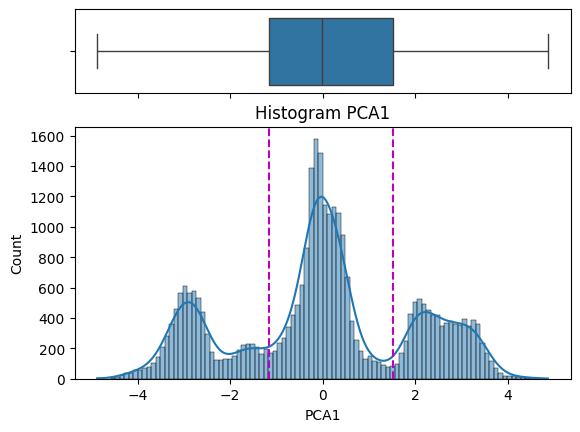

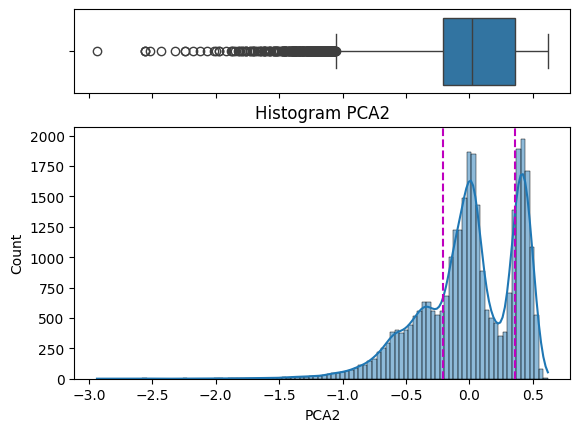

In [36]:
box_hist_plot_complete(X_PCA)

In [37]:
cross_val(X_PCA,Y_CO)

Cross-Validation average is -1.2348200206863762, with standard deviation of 0.06304302734889235


In [38]:
cross_val(X_PCA,Y_NOX)

Cross-Validation average is -5.868044518754539, with standard deviation of 0.10251047583383652


In [39]:


# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],        # Number of boosting stages
    'learning_rate': [0.05, 0.1],    # Learning rate
    'max_depth': [3, 5],                # Maximum tree depth
    'min_samples_split': [2, 10],       # Min samples required to split a node
    'min_samples_leaf': [1,  5],         # Min samples required at leaf node
    'subsample': [0.6, 1.0],          # Fraction of samples used for each tree
    'max_features': ['sqrt', 'log2'] # Number of features to consider for splits
}

# Initialize the model
GB = GradientBoostingRegressor(random_state=42)

# Perform Grid search
grid_search = GridSearchCV(
    estimator=GB,
    param_grid=param_grid,                 
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    
)

# Fit the model
grid_search.fit(X_PCA, Y_CO)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
best_rmse_GB = (-grid_search.best_score_) ** 0.5
print("Best CV RMSE (GBoost):", best_rmse_GB)



Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}
Best CV RMSE (GBoost): 1.1408542254133205


In [40]:
grid_search.fit(X_PCA, Y_NOX)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
best_rmse_GB = (-grid_search.best_score_) ** 0.5
print("Best CV RMSE (GBoost):", best_rmse_GB)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}
Best CV RMSE (GBoost): 4.7416399549354145


### Plotting the learning curve for CO and NOX

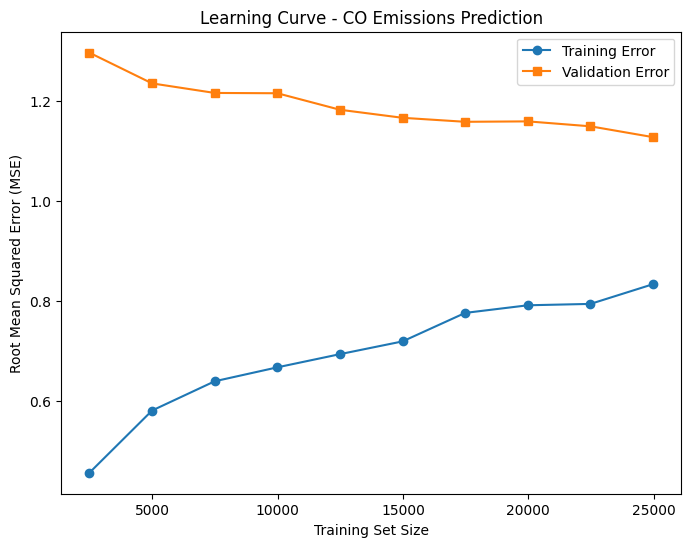

In [41]:
from sklearn.model_selection import learning_curve
GB = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=5,
                                max_features='sqrt',min_samples_leaf=5,
                                min_samples_split=2,subsample=1.0)
                               
train_sizes, train_scores, test_scores = learning_curve(
    GB, X_PCA, Y_CO, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative MSE to positive
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (MSE)")
plt.title("Learning Curve - CO Emissions Prediction")
plt.legend()
plt.show()

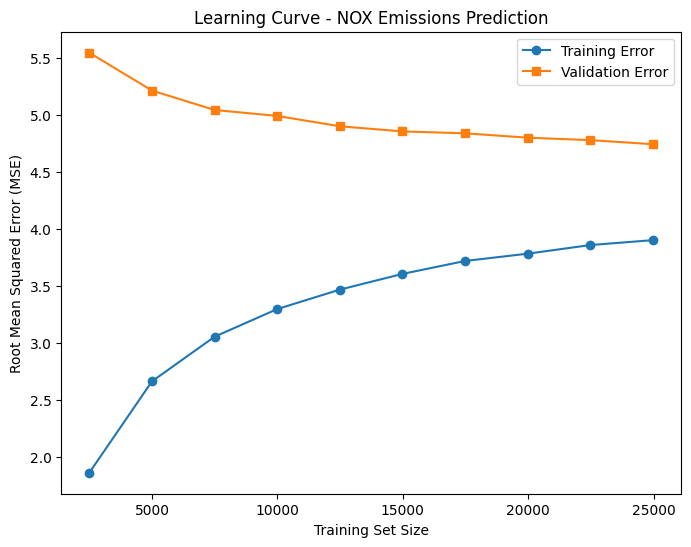

In [42]:
GB = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=5,
                                max_features='sqrt',min_samples_leaf=1,
                                min_samples_split=2,subsample=1.0)
                               
train_sizes, train_scores, test_scores = learning_curve(
    GB, X_PCA, Y_NOX, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative MSE to positive
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (MSE)")
plt.title("Learning Curve - NOX Emissions Prediction")
plt.legend()
plt.show()

In [43]:
GB = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=5,
                                max_features='sqrt',min_samples_leaf=5,
                                min_samples_split=2,subsample=1.0)
cross_val(X_PCA,Y_CO)

Cross-Validation average is -1.1450661776911804, with standard deviation of 0.07419179435477567


In [44]:
GB = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=5,
                                max_features='sqrt',min_samples_leaf=1,
                                min_samples_split=2,subsample=1.0)
cross_val(X_PCA,Y_NOX)

Cross-Validation average is -4.749707561664758, with standard deviation of 0.09014691165138772


**Do the feature importance to find out important if there are less important features in the Dataset**

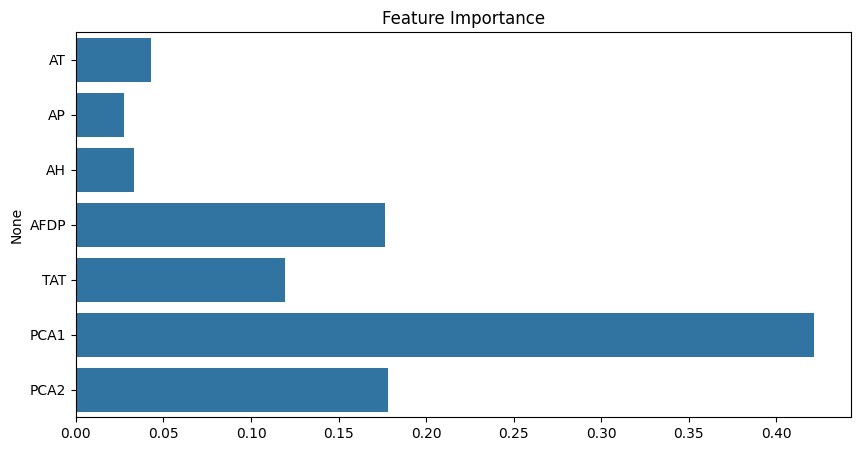

In [45]:
X_PCA_Train , X_PCA_Test, Y_PCA_Train_CO, Y_PCA_Test_CO = train_test_split(X_PCA,Y_CO, random_state=42, train_size=0.95)

GB.fit(X_PCA_Train, Y_PCA_Train_CO)  

# Get feature importance scores
feature_importance = GB.feature_importances_
feature_names = X_PCA_Train.columns

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.show()


In [46]:
X_PCA_IMP = X_PCA.drop(columns=['AT','AP','AH'])
cross_val(X_PCA_IMP,Y_CO)

Cross-Validation average is -1.194786501881912, with standard deviation of 0.06429552845060331


In [47]:
cross_val(np.array(X_PCA['PCA1']).reshape(-1,1),Y_CO)

Cross-Validation average is -1.6559403303176627, with standard deviation of 0.08977589835730929


## Check the same process with NOX data

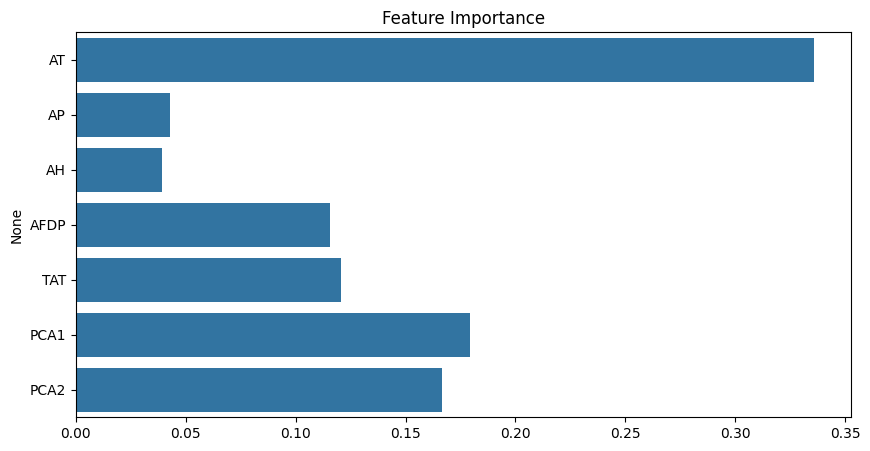

In [48]:
X_PCA_Train , X_PCA_Test, Y_NOX_PCA_Train, Y_NOX_PCA_Test = train_test_split(X_PCA,Y_NOX, random_state=42, train_size=0.95)

GB.fit(X_PCA_Train, Y_NOX_PCA_Train)  

# Get feature importance scores
feature_importance = GB.feature_importances_
feature_names = X_PCA_Train.columns

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.show()


Tried feature engineering by squaring the AT amounts but it did not help to increase the amount of accuracy

In [49]:
X_PCA['AT_squared'] = X_PCA['AT'].apply(lambda x: x**2)

In [50]:
cross_val(X_PCA,Y_NOX)

Cross-Validation average is -4.773331941916811, with standard deviation of 0.09218736488913364


In [51]:
X_PCA.drop(columns=['AT_squared'],inplace=True)

In [52]:
X_PCA.head()

,AT,AP,AH,AFDP,TAT,PCA1,PCA2
8537,-1.591373,2.290015,-0.305982,0.620440,0.026316,-0.264614,0.340673
29199,-0.268229,0.629692,-1.155290,-0.282862,-1.315789,2.606744,-0.312024
5707,0.930103,-0.177194,-0.554418,0.133421,0.031955,0.409687,0.481408
19735,1.718089,0.288317,-1.194918,-0.043677,0.022556,-2.489839,0.058289
10299,1.523078,0.055562,-1.635097,0.290124,0.007519,0.286731,0.438458


**Conclusion**

This is the highest Accuracy we can achieve in our Dataset 

## Light GradientBoost

In [53]:


# Define model
model = LGBMRegressor(n_estimators=200, learning_rate=0.05, num_leaves=31)

# Define cross-validation strategy (5-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_PCA, Y_CO, cv=kf, scoring='neg_root_mean_squared_error')

# Convert negative MSE to RMSE


print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE: {cv_scores.mean():.4f}")
print(f"Standard Deviation of RMSE: {cv_scores.std():.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 24978, number of used features: 7
[LightGBM] [Info] Start training from score 2.370127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 24978, number of used features: 7
[LightGBM] [Info] Start training from score 2.364981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1724
[LightGBM] [Info] Number of data points in the train set: 24978, number of used features: 7
[LightGBM] [Info] Start traini

In [54]:
model = LGBMRegressor(n_estimators=200, learning_rate=0.05, num_leaves=31)

# Define cross-validation strategy (5-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_PCA, Y_NOX, cv=kf, scoring='neg_root_mean_squared_error')

# Convert negative MSE to RMSE


print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE: {cv_scores.mean():.4f}")
print(f"Standard Deviation of RMSE: {cv_scores.std():.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 24978, number of used features: 7
[LightGBM] [Info] Start training from score 65.300621
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 24978, number of used features: 7
[LightGBM] [Info] Start training from score 65.298102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1724
[LightGBM] [Info] Number of data points in the train set: 24978, number of used features: 7
[LightGBM] [Info] Start trai

### GridSearch for LightGBoosting

#### For CO2 

In [55]:

# Define parameter grid
param_grid = {
    'num_leaves': [20, 31, 40,50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500,600],
    'subsample': [0.7, 0.8, 1.0]
}
LightGB_model=LGBMRegressor()
# Set up Grid Search
grid_search = GridSearchCV(LightGB_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_PCA, Y_CO)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 31223, number of used features: 7
[LightGBM] [Info] Start training from score 2.371235
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 500, 'num_leaves': 31, 'subsample': 0.7}
Best RMSE: 1.1015844851231642


#### For NOX

In [56]:

# Set up Grid Search
grid_search = GridSearchCV(LightGB_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_PCA, Y_NOX)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 31223, number of used features: 7
[LightGBM] [Info] Start training from score 65.299733
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 600, 'num_leaves': 50, 'subsample': 0.7}
Best RMSE: 4.091154914757761


### Learning Curve for LightGboost

#### CO2

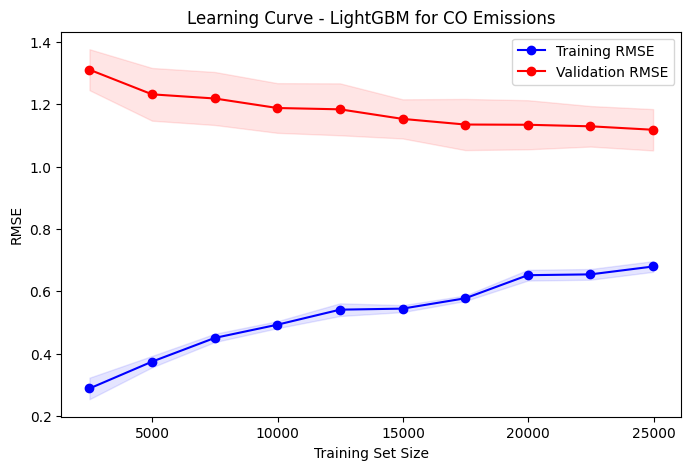

In [57]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import learning_curve
final_model_CO = LGBMRegressor(learning_rate=0.1,
                            n_estimators=500,
                            num_leaves = 31,
                            subsample = 0.7)

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(
    final_model_CO, X_PCA, Y_CO, train_sizes=train_sizes, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert negative MSE to RMSE
train_scores = np.sqrt(-train_scores)
test_scores = np.sqrt(-test_scores)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training RMSE")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation RMSE")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve - LightGBM for CO Emissions")
plt.legend(loc="best")
plt.show()

#### NOX

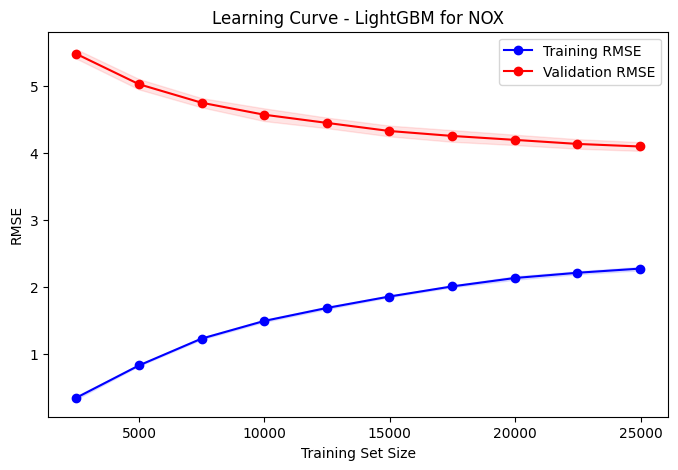

In [58]:
final_model_NOX = LGBMRegressor(learning_rate=0.1,
                            n_estimators=600,
                            num_leaves = 50,
                            subsample = 0.7)

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(
    final_model_NOX, X_PCA, Y_NOX, train_sizes=train_sizes, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert negative MSE to RMSE
train_scores = np.sqrt(-train_scores)
test_scores = np.sqrt(-test_scores)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training RMSE")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation RMSE")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve - LightGBM for NOX")
plt.legend(loc="best")
plt.show()

## Trainnig and Testing the data

#### for CO

In [60]:
PCA_Columns = ['GTEP','TIT','TEY','CDP']
Standard_Columns = ['AP','AT','AFDP']
Robust_columns = ['AH','TAT']

In [61]:
X_test[PCA_Columns]=Standard_scaler.transform(X_test[PCA_Columns])
X_test[Robust_columns]=rob_scaler.transform(X_test[Robust_columns])
X_test[Standard_Columns]=Standard_scaler_For_The_Rest.transform(X_test[Standard_Columns])
Energy_test= pca.transform(X_test[['GTEP','TIT','TEY','CDP']])
X_PCA_Test = X_test.drop(columns = ['GTEP','TIT','TEY','CDP'])
X_PCA_Test[['PCA1','PCA2'] ]= Energy_test


In [62]:
X_PCA_Test.head()

,AT,AP,AH,AFDP,TAT,PCA1,PCA2
28828,-0.694051,-1.309937,0.083002,-0.319263,-1.590226,2.519604,-0.194208
4009,1.159029,-0.192711,-0.667615,-0.195604,0.013158,0.233976,0.454411
17990,-0.450051,-1.511658,0.623483,-1.414894,0.005639,-3.173531,-0.130886
263,-0.770091,0.024528,0.294179,1.124756,-3.637218,3.049133,-0.444844
34917,-0.026248,0.303834,0.025408,-0.280022,0.078947,-0.430095,0.073553


In [65]:
from lightgbm import LGBMRegressor
final_model_CO = LGBMRegressor(learning_rate=0.1,
                            n_estimators=500,
                            num_leaves = 31,
                            subsample = 0.7)

final_model_CO.fit(X_PCA,Y_CO)


Y_pred_CO = final_model_CO.predict(X_PCA_Test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 31223, number of used features: 7
[LightGBM] [Info] Start training from score 2.371235


In [67]:
from sklearn.metrics import root_mean_squared_error

RMSE_CO = root_mean_squared_error(Y_CO_Test,Y_pred_CO)

print(f"Root Mean Square Error for CO emission is :   {RMSE_CO}")

Root Mean Square Error for CO emission is :   1.083754252383733


#### plotting actual/predict ration for CO

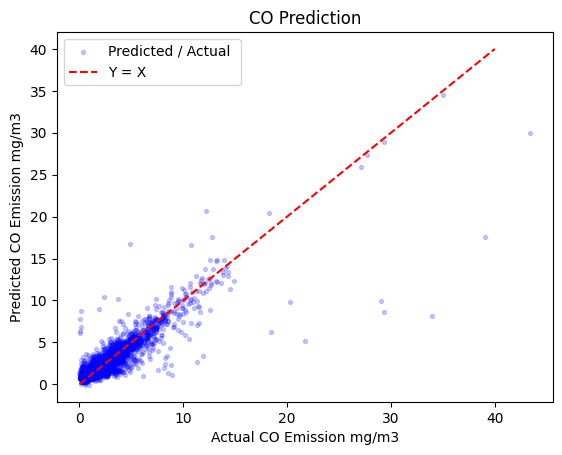

In [69]:
plt.figure()
plt.title('CO Prediction')
plt.scatter(Y_CO_Test,Y_pred_CO,s=8,alpha = 0.2, c = 'blue',label = 'Predicted / Actual ')
plt.plot([0,40],[0,40],
         color='red',
         linestyle = '--',
         label = 'Y = X')
plt.xlabel('Actual CO Emission mg/m3')
plt.ylabel('Predicted CO Emission mg/m3')
plt.legend(loc = 'upper left')
plt.show()

#### for NOX

In [70]:
final_model_NOX.fit(X_PCA,Y_NOX)

Y_pred_NOX = final_model_NOX.predict(X_PCA_Test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 31223, number of used features: 7
[LightGBM] [Info] Start training from score 65.299733


In [71]:
RMSE_NOX = root_mean_squared_error(Y_NOX_Test ,Y_pred_NOX)
print(f"Root Mean Square Error for NOX emission is :   {RMSE_NOX}")

Root Mean Square Error for NOX emission is :   3.9388134591099084


#### ploting actual / predict ratio for NOX

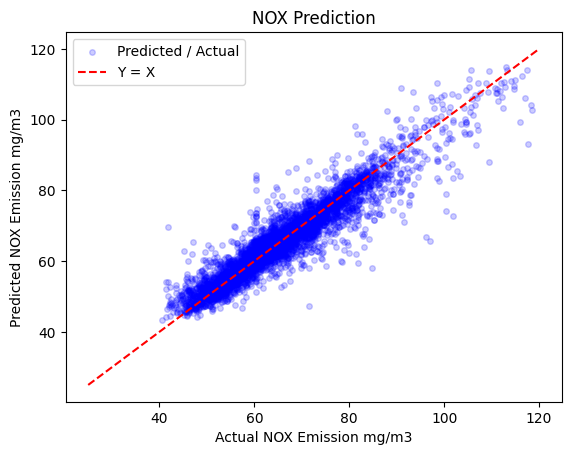

In [72]:
plt.figure()
plt.title('NOX Prediction')
plt.scatter(Y_NOX_Test,Y_pred_NOX , s=16,alpha=0.2 , c='blue',
            label = 'Predicted / Actual')
plt.plot([25,120],[25,120],color='red',linestyle = '--',
         label = 'Y = X')
plt.legend(loc = 'upper left')
plt.xlabel('Actual NOX Emission mg/m3')
plt.ylabel('Predicted NOX Emission mg/m3')
plt.show()

In [73]:
X.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
count,31223.000000,31223.000000,31223.000000,31223.000000,3.122300e+04,3.122300e+04,31223.000000,3.122300e+04,3.122300e+04
mean,17.719029,1013.041929,77.912898,3.924437,-5.634641e-16,-2.809128e-15,546.163099,-8.276732e-16,-1.374980e-15
std,7.430450,6.444635,14.452980,0.774725,1.000016e+00,1.000016e+00,6.833211,1.000016e+00,1.000016e+00
min,-6.234800,986.250000,24.085000,2.087400,-1.870770e+00,-4.594936e+00,511.040000,-2.140926e+00,-2.025734e+00
25%,11.806500,1008.800000,68.276500,3.353950,-5.864072e-01,-5.587245e-01,544.720000,-5.872517e-01,-5.823123e-01
50%,17.817000,1012.600000,80.543000,3.936800,-1.084329e-01,2.564991e-01,549.880000,1.661735e-02,-8.746143e-02
75%,23.661000,1016.900000,89.372500,4.377250,8.372750e-01,8.892950e-01,550.040000,6.790492e-01,7.310164e-01
max,37.103000,1036.600000,100.200000,7.554900,3.611050e+00,1.111629e+00,550.610000,2.946038e+00,2.846756e+00


## make final Pipeline tomorrow